In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
val_path="validation"
train_path="train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [3]:
class_names = train_dataset.class_names
print(len(class_names))

36


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

In [5]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

C:\Users\marco\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
history = model.fit(x=train_dataset,
                    epochs= 20,
                    validation_data=val_dataset)

Epoch 1/20
98/98 [==============================] - 132s 1s/step - loss: 3.0858 - accuracy: 0.1692 - val_loss: 2.5892 - val_accuracy: 0.2365
Epoch 2/20
98/98 [==============================] - 139s 1s/step - loss: 2.1878 - accuracy: 0.3567 - val_loss: 1.5428 - val_accuracy: 0.5328
Epoch 3/20
98/98 [==============================] - 155s 2s/step - loss: 1.8484 - accuracy: 0.4610 - val_loss: 1.6504 - val_accuracy: 0.5613
Epoch 4/20
98/98 [==============================] - 163s 2s/step - loss: 1.5808 - accuracy: 0.5352 - val_loss: 0.8299 - val_accuracy: 0.7692
Epoch 5/20
98/98 [==============================] - 160s 2s/step - loss: 1.3263 - accuracy: 0.6074 - val_loss: 1.6531 - val_accuracy: 0.5499
Epoch 6/20
98/98 [==============================] - 162s 2s/step - loss: 1.1302 - accuracy: 0.6514 - val_loss: 0.8867 - val_accuracy: 0.7550
Epoch 7/20
98/98 [==============================] - 158s 2s/step - loss: 0.9488 - accuracy: 0.7175 - val_loss: 1.4136 - val_accuracy: 0.6125
Epoch 8/20
98

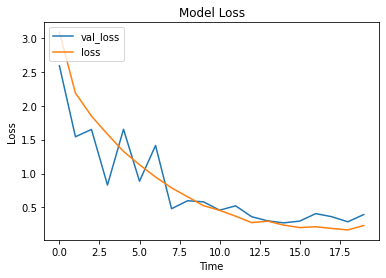

In [7]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

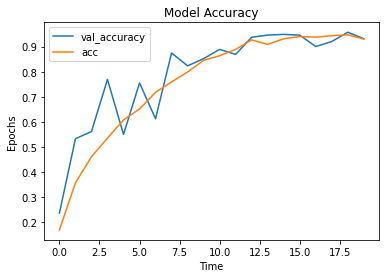

In [8]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

In [9]:
from keras_preprocessing import image
image_path="test//Image_10.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

FileNotFoundError: [Errno 2] No such file or directory: 'test//Image_10.jpg'

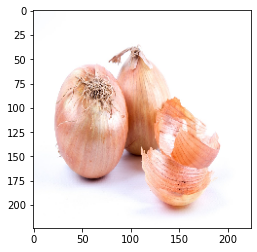

Actual: onion
Predicted: ginger
[[6.5045333e-07 4.1127936e-07 6.0061288e-06 2.1897317e-09 4.9647358e-08
  7.9771700e-09 8.5224547e-06 9.2228889e-05 2.9625502e-08 5.7959461e-08
  1.9586265e-08 4.0444339e-11 1.0069886e-04 8.7334138e-01 5.5416880e-09
  5.3578898e-08 2.0391759e-08 5.2333682e-05 1.4812114e-09 1.7650854e-07
  1.2528059e-01 1.9489943e-07 7.8166480e-08 7.4277165e-07 1.5048184e-09
  6.8126309e-07 3.9015735e-08 2.3055604e-06 9.9225199e-06 1.3202663e-06
  2.2240515e-11 3.0241058e-08 1.0983020e-03 4.4742882e-07 2.6114910e-06
  5.4201856e-09]]
[13]


In [28]:
from keras_preprocessing import image
image_path="test/onion/Image_6.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])
print(pred)
print(label)

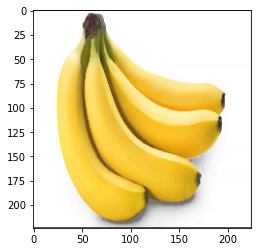

Actual: banana
Predicted: banana
[[2.90545501e-07 9.99850631e-01 5.71278832e-12 4.55741722e-10
  1.12439984e-12 1.33265514e-08 4.17393247e-12 2.18745936e-06
  1.62670666e-09 2.64288968e-09 4.15678221e-11 3.72096261e-13
  4.02368486e-11 2.60514958e-06 1.90409222e-09 5.36102607e-10
  4.34317485e-07 1.09377042e-05 1.73735176e-11 6.74142648e-05
  1.83597578e-07 3.05578794e-07 2.89863411e-10 1.44540806e-07
  1.78117937e-11 5.76982212e-11 2.55762642e-13 6.42285086e-05
  1.12150156e-09 4.59942973e-10 4.16702046e-12 4.10829983e-07
  1.54082997e-07 4.50936788e-10 3.39733713e-10 1.09378846e-10]]
[1]


In [24]:
from keras_preprocessing import image
image_path="test/banana/Image_5.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])
print(pred)
print(label)

In [21]:
# predecir la etiqueta de test_images


NameError: name 'train_images' is not defined

In [ ]:
from keras_preprocessing import image
image_path="test/tomato/Image_2.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

In [29]:
model.save('frutas_vegetales.h5')

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model,'models')

In [ ]:
#!tensorflowjs_converter --input_format=keras frutas_vegetales.h5 modelo